<a href="https://colab.research.google.com/github/lucasbegue/clases-ML/blob/main/notebook_clase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [ ]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import io
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

# Datos

Descargar el archivo 'insurance.csv' de la carpeta 'datasets' del drive. Despues subirlo a esta notebook.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/lucasbegue/clases-ML/main/datasets/insurance.csv')
df.shape

(1338, 7)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Análisis exploratorio

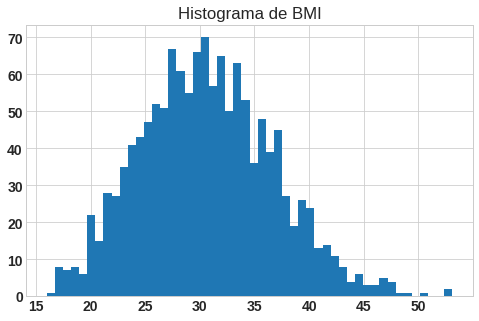

In [ ]:
plt.hist(df.bmi, bins=50)
plt.title('Histograma de BMI')
plt.show()

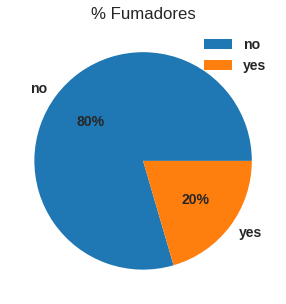

In [ ]:
plt.pie(df.smoker.value_counts(), labels=df.smoker.value_counts().index, autopct='%1.0f%%')
plt.title("% Fumadores")
plt.legend(loc="upper right")
plt.show()

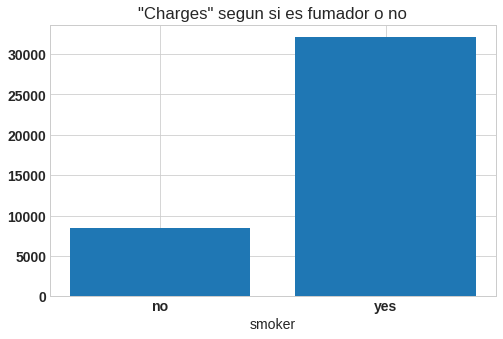

In [ ]:
df_gb_smoker = df.groupby(['smoker'])['charges'].mean()
plt.bar(x=df_gb_smoker.index, height=df_gb_smoker.values)
plt.title('"Charges" segun si es fumador o no')
plt.xlabel('smoker')
plt.show()

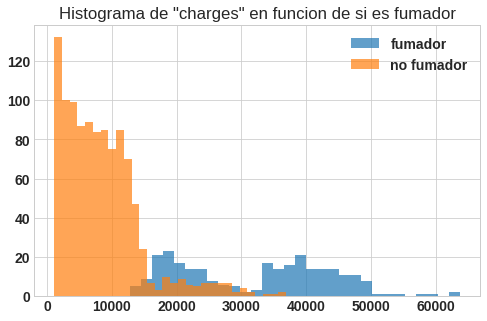

In [ ]:
plt.hist(df[df.smoker=='yes'].charges, alpha=0.7, label='fumador', bins=30)
plt.hist(df[df.smoker=='no'].charges, alpha=0.7, label='no fumador', bins=30)
plt.title('Histograma de "charges" en funcion de si es fumador')
plt.legend(loc='upper right')
plt.show()

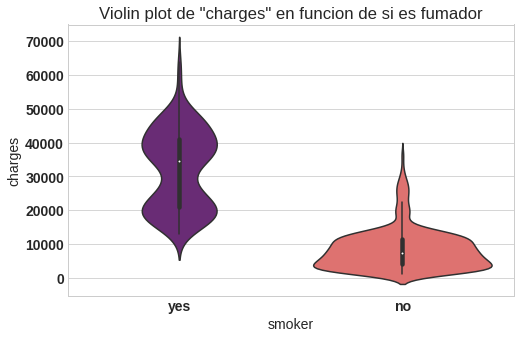

In [ ]:
sns.violinplot(x='smoker', y='charges',data=df,palette='magma')
plt.title('Violin plot de "charges" en funcion de si es fumador')
plt.show()

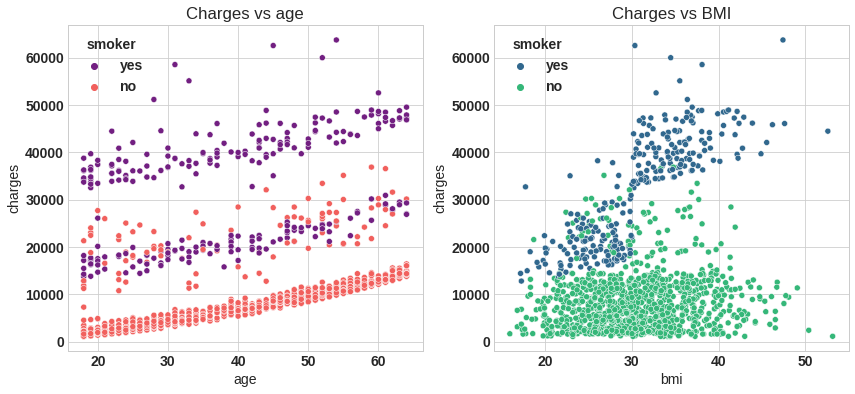

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age', y='charges', data=df, palette='magma', hue='smoker',ax=ax)
ax.set_title('Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df, palette='viridis',hue='smoker')
ax.set_title('Charges vs BMI')

plt.show()

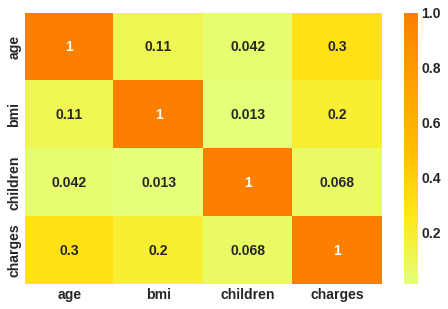

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

# Pre-procesamiento de datos

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['smoker'] = le.fit_transform(df.smoker)
df['sex'] = le.fit_transform(df.sex)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
# Vemos cuales son los valores posibles de 'region'
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
# No podemos utilizar LabelEncoder porque esto usaria los numeros del 0 al 3 para indicar la region
# Esto indicaría cardinalidad (y no queremos que haya)
# Creamos 4 columnas binarias (una para cada region)
df = pd.get_dummies(df, columns=['region'])
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


Utilizamos el logaritmo de la variable dependiente

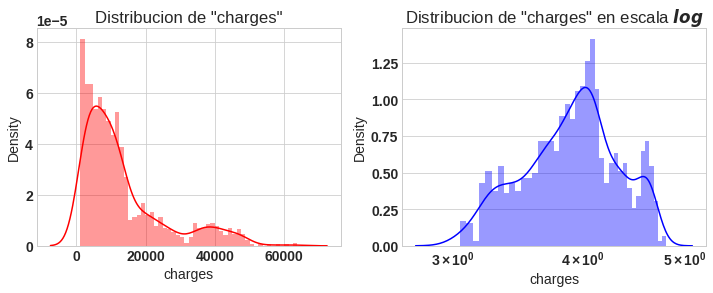

In [ ]:
f= plt.figure(figsize=(12,4))

ax = f.add_subplot(121)
sns.distplot(df.charges, bins=50, color='red', ax=ax)
ax.set_title('Distribucion de "charges"')

ax = f.add_subplot(122)
sns.distplot(np.log10(df.charges), bins=40, color='blue', ax=ax)
ax.set_title('Distribucion de "charges" en escala $log$')
ax.set_xscale('log')

plt.show()

In [ ]:
# Aplicamos la transformacion logaritmica a la variable target 
df['charges'] = np.log(df['charges'])

# Regresion Lineal

In [ ]:
X = df.drop('charges', axis=1) # Variables independientes
y = df['charges'] # Variable dependiente

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=23
)

### Entrenamiento

In [ ]:
# Fiteo del model a los datos de entrenamineto
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Coeficientes del modelo
df_coeficientes = pd.DataFrame(
    {
     'predictor': ['intersecto'] + list(X_train.columns.values),
     'coef': [modelo.intercept_] + list(modelo.coef_)
    }
)
df_coeficientes

,predictor,coef
0,intersecto,6.958113
1,age,0.033132
2,sex,-0.075076
3,bmi,0.014845
4,children,0.100319
5,smoker,1.547576
6,region_northeast,0.089869
7,region_northwest,0.030010
8,region_southeast,-0.059389
9,region_southwest,-0.060490


### Evaluacion

In [ ]:
# Predicciones test
y_pred = modelo.predict(X=X_test)
y_pred = y_pred.flatten()

# Error de test del modelo 
rmse_ols = mean_squared_error(
    y_true  = y_test,
    y_pred  = y_pred,
    squared = False
)

print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 0.4413929620004681


# Pipeline de inferencia
### To be done